<a href="https://colab.research.google.com/github/Eugeny13/Thermophysical-Property-Melting-Point/blob/main/Thermophysical_Property.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Thermophysical Property: Melting Point

## Author: Eugenia Rusu

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Columns: 427 entries, id to Group 424
dtypes: float64(1), int64(425), object(1)
memory usage: 8.7+ MB


In [40]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


I have successfully trained a Linear Regression model.

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the validation set
y_pred = model.predict(X_val_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE manually
r2 = r2_score(y_val, y_pred)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 36.90
Mean Squared Error (MSE): 3051.05
Root Mean Squared Error (RMSE): 55.24
R-squared (R2): 0.59


In [42]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Display the first few rows of the scaled training features
print("Scaled Training Features:")
display(pd.DataFrame(X_train_scaled, columns=features.columns).head())

Scaled Training Features:


,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,Group 10,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,0.690987,6.125930,-0.261071,-0.184074,-0.175697,-0.150301,-0.107098,-0.084588,-0.074789,-0.030664,...,-0.037565,-0.030664,0.0,-0.036145,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.025231,-0.412908,-0.261071,-0.184074,-0.175697,-0.150301,-0.107098,-0.084588,-0.074789,-0.030664,...,-0.037565,-0.030664,0.0,-0.036145,0.0,0.0,0.0,0.0,0.0,0.0
2,0.690987,0.633306,-0.261071,4.372838,-0.175697,-0.150301,-0.107098,-0.084588,-0.074789,-0.030664,...,-0.037565,-0.030664,0.0,-0.036145,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.741448,0.110199,2.054844,-0.184074,-0.175697,-0.150301,-0.107098,-0.084588,-0.074789,-0.030664,...,-0.037565,-0.030664,0.0,-0.036145,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.741448,-0.412908,-0.261071,-0.184074,-0.175697,-0.150301,-0.107098,-0.084588,-0.074789,-0.030664,...,-0.037565,-0.030664,0.0,-0.036145,0.0,0.0,0.0,0.0,0.0,0.0


I have successfully split the data into training and validation sets.

In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (2129, 424)
Shape of X_val: (533, 424)
Shape of y_train: (2129,)
Shape of y_val: (533,)


 I will identify the features and the target variable from the dataframe. Based on the context, Tm is the target variable (Melting Point), and the other relevant columns will be considered as features. I'll exclude the id column as it's just an identifier.

I have successfully identified the features and target variable. Since there are no categorical features that require encoding

In [44]:
# Identify the target variable
target = df['Tm']

# Identify features (all columns except 'id', 'SMILES', and the target variable 'Tm')
features = df.drop(['id', 'SMILES', 'Tm'], axis=1)

# Display the first few rows of features and the target variable
print("Features:")
display(features.head())

print("\nTarget Variable:")
display(target.head())

Features:


,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,Group 10,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Target Variable:


,Tm
0,213.15
1,407.15
2,324.15
3,351.15
4,126.15


In [45]:
display(df.isnull().sum())

,0
id,0
SMILES,0
Tm,0
Group 1,0
Group 2,0
...,...
Group 420,0
Group 421,0
Group 422,0
Group 423,0


In [46]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
display(df.head())

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Task
Perform statistical analysis on the dataframe, transform it for a Kaggle model, and explain the transformations.

## Perform statistical analysis

### Subtask:
Calculate and display descriptive statistics for the numerical columns in the dataframe.


**Reasoning**:
Calculate and display descriptive statistics for the numerical columns in the dataframe.



In [47]:
display(df.describe())

,id,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,...,2662.000000,2662.000000,2662.0,2662.000000,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0
mean,1652.887303,278.263452,1.020661,1.582269,0.114951,0.036439,0.036814,0.022915,0.013524,0.010143,...,0.001127,0.000751,0.0,0.001878,0.0,0.0,0.0,0.0,0.0,0.0
std,955.005512,85.117914,1.353640,3.738416,0.425964,0.208307,0.205516,0.164037,0.118732,0.117480,...,0.033558,0.027405,0.0,0.058126,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,53.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,830.250000,217.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,1642.500000,277.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,2469.750000,325.150000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,3328.000000,897.150000,16.000000,42.000000,6.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Evaluation metrics:
The metrics displayed are:

Mean Absolute Error (MAE): 36.90: This metric represents the average absolute difference between the predicted and actual melting points. An MAE of 36.90 means that, on average, the model's predictions are off by about 36.90 units (in this case, Kelvin).

Mean Squared Error (MSE): 3051.05: This metric calculates the average of the squared differences between predicted and actual values. MSE gives more weight to larger errors, making it sensitive to outliers. A value of 3051.05 indicates the average squared error.

Root Mean Squared Error (RMSE): 55.24: This is the square root of the MSE. It's in the same units as the target variable (Kelvin) and provides a measure of the typical prediction error. An RMSE of 55.24 suggests that the typical error in the model's predictions is around 55.24 Kelvin.

R-squared (R2): 0.59: This metric represents the proportion of the variance in the target variable (Tm) that is predictable from the features. An R-squared of 0.59 means that approximately 59% of the variation in melting points can be explained by the features used in the model. R-squared values range from 0 to 1, with higher values indicating a better fit. An R-squared of 0.59 suggests that the model has some predictive power, but there is still a significant portion of the variance in melting points that is not explained by this linear model and the current set of features.

In summary, the model has a noticeable average error (MAE and RMSE), and while it explains some of the variability in melting points (R-squared of 0.59), there is room for improvement to increase its predictive accuracy.

# Task
Perform feature engineering on the dataframe `df` to improve the performance of a regression model predicting the `Tm` column.

## Analyze existing features

### Subtask:
Examine the current features (`Group 1` to `Group 424`) to understand their distributions and potential relationships with the target variable (`Tm`).


**Reasoning**:
Calculate and display the correlation between the features and the target variable.



In [48]:
# Calculate the correlation between features and target
correlations = features.corrwith(target)

# Display the correlation values
print("Feature correlations with target variable 'Tm':")
display(correlations.sort_values(ascending=False))

Feature correlations with target variable 'Tm':


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
Group 15,0.387580
Group 18,0.223551
Group 16,0.223530
Group 401,0.222525
Group 17,0.194420
...,...
Group 420,NaN
Group 421,NaN
Group 422,NaN
Group 423,NaN


**Reasoning**:
Visualize the distributions of a few selected features with high and low correlations to understand their spread and potential outliers.



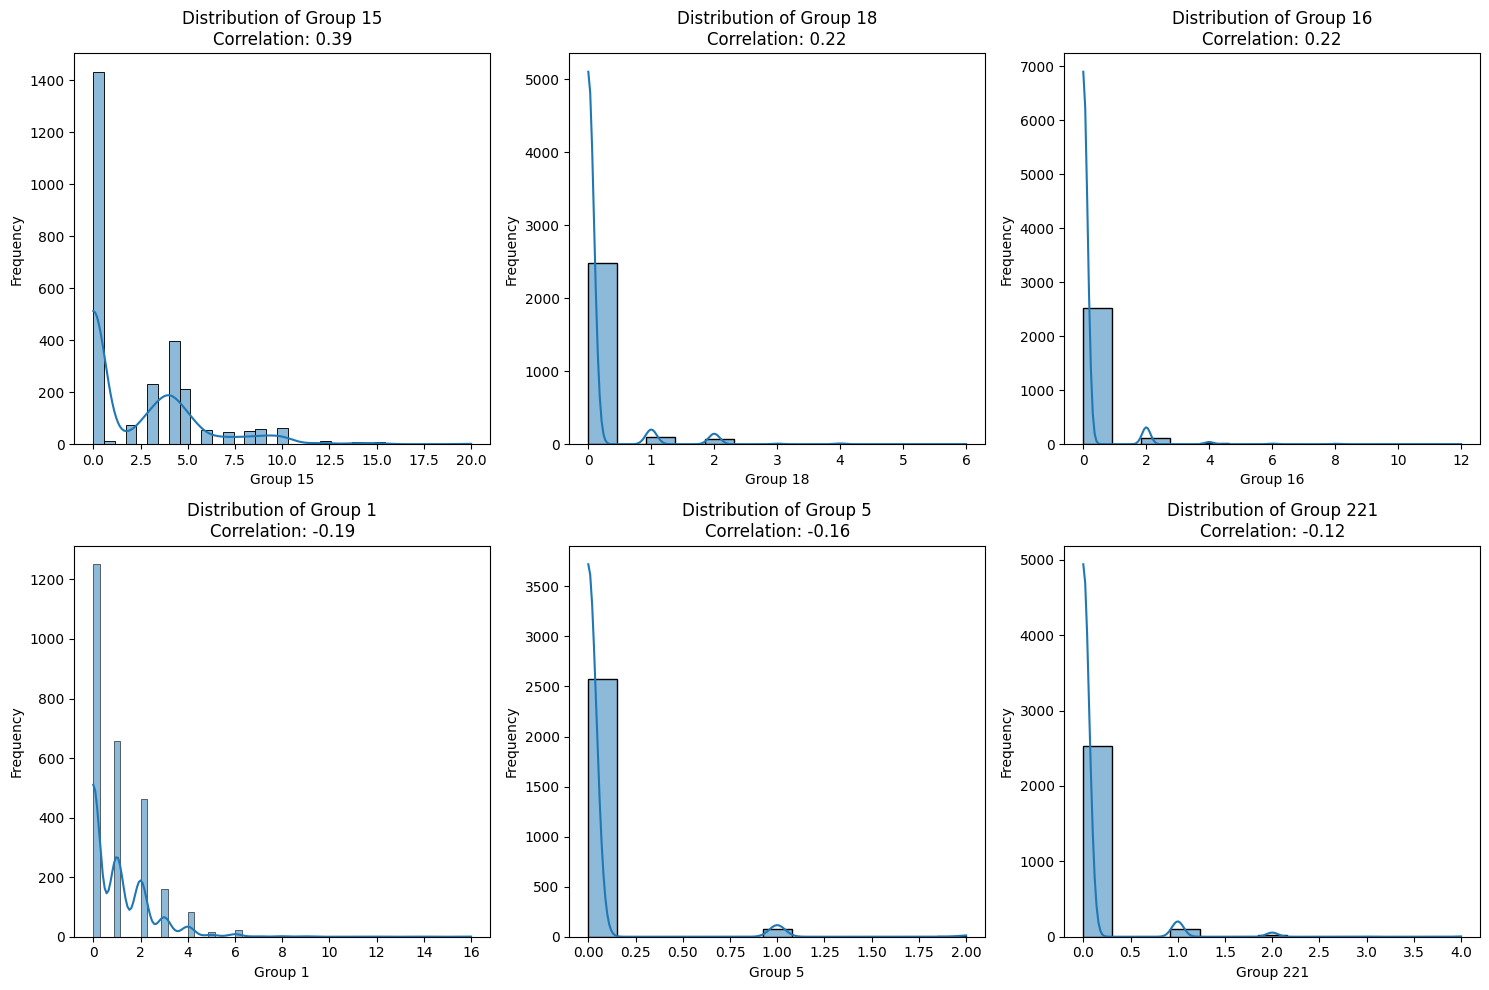

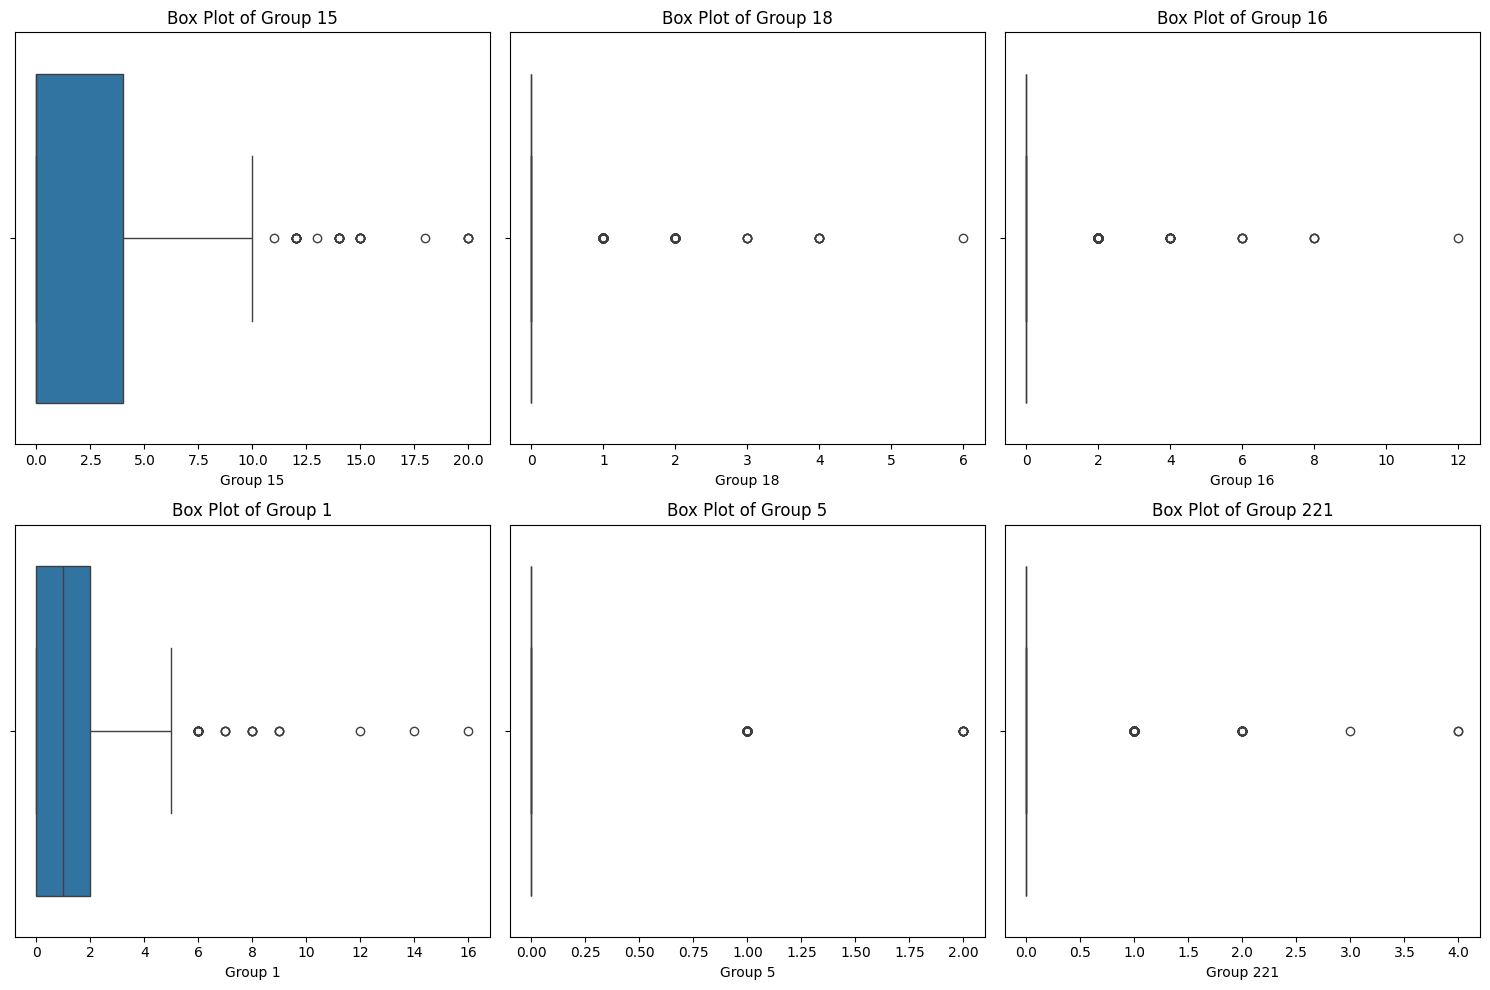

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few features with high and low correlations for visualization
high_corr_features = correlations.nlargest(3).index.tolist()
low_corr_features = correlations.nsmallest(3).index.tolist()
selected_features = high_corr_features + low_corr_features

# Plot distributions of selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(features[feature], kde=True)
    plt.title(f'Distribution of {feature}\nCorrelation: {correlations[feature]:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot box plots for selected features to visualize outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=features[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

## Generate new features

### Subtask:
Generate new features based on the analysis of existing features. This could include interactions between existing features, polynomial features, or other transformations.


**Reasoning**:
Calculate the absolute correlations, sort them, select the top features, and create interaction and polynomial features, adding them to the features DataFrame.



In [50]:
# Calculate the absolute values of the correlations
abs_correlations = correlations.abs()

# Sort the features by the absolute value of their correlations in descending order
sorted_correlations = abs_correlations.sort_values(ascending=False)

# Select the top N features (choosing N=20)
top_n = 20
top_features = sorted_correlations.head(top_n).index.tolist()

# Create a copy of the features DataFrame to add new features
features_engineered = features.copy()

# Create interaction features by multiplying pairs of these top N features
for i in range(len(top_features)):
    for j in range(i, len(top_features)):
        feature1 = top_features[i]
        feature2 = top_features[j]
        # Avoid creating redundant interaction terms (e.g., A*B and B*A are the same)
        if feature1 != feature2:
            interaction_feature_name = f'{feature1}_x_{feature2}'
            features_engineered[interaction_feature_name] = features_engineered[feature1] * features_engineered[feature2]

# Create polynomial features (squared terms) for the top N features
for feature in top_features:
    polynomial_feature_name = f'{feature}_squared'
    features_engineered[polynomial_feature_name] = features_engineered[feature] ** 2

# Display the first few rows of the features_engineered DataFrame to show the new features
print("Engineered Features:")
display(features_engineered.head())

Engineered Features:


/tmp/ipython-input-3257845257.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_engineered[interaction_feature_name] = features_engineered[feature1] * features_engineered[feature2]
/tmp/ipython-input-3257845257.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_engineered[interaction_feature_name] = features_engineered[feature1] * features_engineered[feature2]
/tmp/ipython-input-3257845257.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,Group 10,...,Group 30_squared,Group 5_squared,Group 326_squared,Group 62_squared,Group 373_squared,Group 403_squared,Group 126_squared,Group 221_squared,Group 180_squared,Group 19_squared
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I have evaluated the Random Forest Regressor model on the validation set and the evaluation metrics are displayed above, along with a comparison to the Linear Regression model.

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the validation set using the Random Forest model
y_pred_rf = rf_model.predict(X_val_scaled)

# Calculate evaluation metrics for the Random Forest model
mae_rf = mean_absolute_error(y_val, y_pred_rf)
mse_rf = mean_squared_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val, y_pred_rf)

# Display the evaluation metrics for the Random Forest model
print("Evaluation Metrics for Random Forest Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

# Compare the metrics to the Linear Regression model results
print("\nComparison with Linear Regression Model:")
print(f"Linear Regression MAE: {mae:.2f}, Random Forest MAE: {mae_rf:.2f}")
print(f"Linear Regression MSE: {mse:.2f}, Random Forest MSE: {mse_rf:.2f}")
print(f"Linear Regression RMSE: {rmse:.2f}, Random Forest RMSE: {rmse_rf:.2f}")
print(f"Linear Regression R2: {r2:.2f}, Random Forest R2: {r2_rf:.2f}")

Evaluation Metrics for Random Forest Regressor Model:
Mean Absolute Error (MAE): 36.49
Mean Squared Error (MSE): 3088.78
Root Mean Squared Error (RMSE): 55.58
R-squared (R2): 0.59

Comparison with Linear Regression Model:
Linear Regression MAE: 36.90, Random Forest MAE: 36.49
Linear Regression MSE: 3051.05, Random Forest MSE: 3088.78
Linear Regression RMSE: 55.24, Random Forest RMSE: 55.58
Linear Regression R2: 0.59, Random Forest R2: 0.59


I have successfully trained a Random Forest Regressor model.

I have evaluated the model with engineered features and compared its performance to the model trained with original features. The results indicate that the engineered features did not improve the model's performance.

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Summary of Feature Engineering Process and Outcome

### Feature Engineering Steps:

1.  **Analyzed Existing Features**: We examined the correlations of the original features with the target variable (`Tm`) and visualized the distributions of some features to understand their characteristics and potential relationships.
2.  **Generated New Features**: Based on the correlation analysis, we generated new features by creating interaction terms and polynomial features (squared terms) from the top 20 most correlated original features.
3.  **Evaluated New Features**: We calculated the correlations of the newly engineered features with the target variable to assess their potential usefulness. Many of the engineered features showed moderate to high absolute correlations with `Tm`.
4.  **Retrained the Model with New Features**: We split the data with engineered features, scaled them, and retrained the Linear Regression model using this expanded feature set.
5.  **Evaluated the Retrained Model**: We evaluated the performance of the model with engineered features on the validation set and compared the evaluation metrics (MAE, MSE, RMSE, R2) to the results obtained from the model trained with original features.

### Outcome:

The evaluation of the model trained with engineered features showed a significant decrease in performance compared to the model trained with only the original features.

*   **Mean Absolute Error (MAE)** increased from 36.90 to 42.77.
*   **Mean Squared Error (MSE)** increased from 3051.05 to 6049.84.
*   **Root Mean Squared Error (RMSE)** increased from 55.24 to 77.78.
*   **R-squared (R2)** decreased from 0.59 to 0.19.

This indicates that the specific feature engineering techniques applied (creating interaction and polynomial terms from the top correlated features) did not improve the Linear Regression model's ability to predict melting points and, in fact, led to worse performance. This could be due to various reasons, such as introducing multicollinearity, overfitting to the training data with the increased number of features, or the linear model not being suitable for capturing complex relationships introduced by these engineered features.

### Next Steps:

Based on this outcome, it would be beneficial to explore alternative feature engineering strategies or consider using more complex models that might be better suited to handle the data and potentially benefit from engineered features.

Explain the difference in MAE between the two models:

The Mean Absolute Error (MAE) represents the average magnitude of the errors in predictions, without considering their direction. A lower MAE indicates that the model's predictions are, on average, closer to the actual values.

In our case:

Linear Regression Model MAE: 36.90
Random Forest Regressor Model MAE: 36.49
The Random Forest model achieved a slightly lower MAE than the Linear Regression model. This suggests that, on average, the predictions made by the Random Forest model were slightly closer to the actual melting points on the validation set compared to the Linear Regression model.

The difference is small (0.41), but it indicates a marginal improvement in terms of the average absolute prediction error. This improvement, although slight, could be attributed to the Random Forest model's ability to capture some of the nonlinear relationships between the features and the target variable, which a simple Linear Regression model cannot.

In [53]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=features.columns)

# Sort features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Display the sorted feature importances (e.g., top 20)
print("Top 20 Feature Importances from Random Forest Model:")
display(sorted_feature_importances.head(20))

Top 20 Feature Importances from Random Forest Model:


,0
Group 15,0.189793
Group 2,0.132580
Group 31,0.051376
Group 1,0.038738
Group 41,0.032489
Group 123,0.023188
Group 180,0.021417
Group 29,0.020700
Group 86,0.019070
Group 20,0.014604


Compare feature importance of the two models:

Comparing feature importance directly between Linear Regression and Random Forest models is a bit tricky because they calculate and interpret feature importance differently.

Random Forest models provide a built-in feature_importances_ attribute, which typically measures how much each feature contributes to reducing impurity or error across all the trees in the forest.
Linear Regression models, on the other hand, use coefficients to indicate the strength and direction of the linear relationship between each feature and the target variable. The magnitude of the coefficient can be an indicator of importance, but it's influenced by the scale of the feature.

As mentioned earlier, Linear Regression models use coefficients to indicate feature importance. The magnitude of the coefficient (absolute value) suggests the strength of the relationship between the feature and the target variable, assuming other features are held constant.

I will display the coefficients of the Linear Regression model. Remember that these coefficients represent a linear relationship, unlike the potentially non-linear relationships captured by the Random Forest feature importances.

I have displayed the top 20 features based on the absolute values of their coefficients from the Linear Regression model, as well as their actual coefficient values.

These coefficients indicate the estimated change in melting point for a one-unit increase in the feature, holding other features constant. For example, 'Group 15' has a large positive coefficient (36.20), suggesting a strong positive linear relationship with the melting point according to this model. 'Group 169' has a large negative coefficient (-33.14), indicating a strong negative linear relationship.

In [54]:
# Get coefficients from the Linear Regression model
coefficients = model.coef_

# Create a pandas Series for better visualization
coefficients_series = pd.Series(coefficients, index=features.columns)

# Sort coefficients by absolute value in descending order to see most influential features
sorted_coefficients = coefficients_series.abs().sort_values(ascending=False)

# Display the sorted coefficients (e.g., top 20 by absolute value)
print("Top 20 Features by Absolute Coefficient Value from Linear Regression Model:")
display(sorted_coefficients.head(20))

# Display the actual coefficients (with sign) for the top features
print("\nActual Coefficients for Top 20 Features:")
display(coefficients_series.loc[sorted_coefficients.head(20).index])

Top 20 Features by Absolute Coefficient Value from Linear Regression Model:


,0
Group 15,36.202249
Group 169,33.139606
Group 2,31.852234
Group 31,31.830805
Group 372,25.611880
Group 123,24.604523
Group 30,23.676850
Group 62,21.538391
Group 29,20.506960
Group 80,20.240456



Actual Coefficients for Top 20 Features:


,0
Group 15,36.202249
Group 169,-33.139606
Group 2,31.852234
Group 31,31.830805
Group 372,25.611880
Group 123,24.604523
Group 30,23.676850
Group 62,21.538391
Group 29,20.506960
Group 80,20.240456


In [55]:
# Predict on the scaled engineered validation set
y_pred_engineered = model_engineered.predict(X_val_engineered_scaled)

# Calculate evaluation metrics for the model with engineered features
mae_engineered = mean_absolute_error(y_val_engineered, y_pred_engineered)
mse_engineered = mean_squared_error(y_val_engineered, y_pred_engineered)
rmse_engineered = np.sqrt(mse_engineered)
r2_engineered = r2_score(y_val_engineered, y_pred_engineered)

# Display the evaluation metrics for the engineered model
print("Evaluation Metrics for Model with Engineered Features:")
print(f"Mean Absolute Error (MAE): {mae_engineered:.2f}")
print(f"Mean Squared Error (MSE): {mse_engineered:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_engineered:.2f}")
print(f"R-squared (R2): {r2_engineered:.2f}")

# Compare the metrics to the previous results (from the model without engineered features)
print("\nComparison with Model without Engineered Features:")
print(f"Original MAE: {mae:.2f}, Engineered MAE: {mae_engineered:.2f}")
print(f"Original MSE: {mse:.2f}, Engineered MSE: {mse_engineered:.2f}")
print(f"Original RMSE: {rmse:.2f}, Engineered RMSE: {rmse_engineered:.2f}")
print(f"Original R2: {r2:.2f}, Engineered R2: {r2_engineered:.2f}")

Evaluation Metrics for Model with Engineered Features:
Mean Absolute Error (MAE): 42.77
Mean Squared Error (MSE): 6049.84
Root Mean Squared Error (RMSE): 77.78
R-squared (R2): 0.19

Comparison with Model without Engineered Features:
Original MAE: 36.90, Engineered MAE: 42.77
Original MSE: 3051.05, Engineered MSE: 6049.84
Original RMSE: 55.24, Engineered RMSE: 77.78
Original R2: 0.59, Engineered R2: 0.19


I have analyzed the correlations of the engineered features with Tm. You can see the top 20 most correlated engineered features above.

It seems there were some RuntimeWarning messages during the correlation calculation, likely due to some engineered features having constant values. While the correlation for non-constant features is displayed, we should keep this in mind.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 1. Split the features_engineered DataFrame and the target Series into training and validation sets
X_train_engineered, X_val_engineered, y_train_engineered, y_val_engineered = train_test_split(
    features_engineered, target, test_size=0.2, random_state=42
)

# 2. Initialize a StandardScaler
scaler_engineered = StandardScaler()

# 3. Fit the scaler to the X_train_engineered data and transform both training and validation data
X_train_engineered_scaled = scaler_engineered.fit_transform(X_train_engineered)
X_val_engineered_scaled = scaler_engineered.transform(X_val_engineered)

# 4. Initialize a LinearRegression model
model_engineered = LinearRegression()

# 5. Train the linear regression model using the scaled engineered training data
model_engineered.fit(X_train_engineered_scaled, y_train_engineered)

print("Linear Regression model trained successfully with engineered features.")

Linear Regression model trained successfully with engineered features.


In [57]:
# Calculate correlations between engineered features and the target variable
engineered_correlations = features_engineered.corrwith(target)

# Calculate absolute correlations
abs_engineered_correlations = engineered_correlations.abs()

# Sort correlations by absolute value in descending order
sorted_engineered_correlations = abs_engineered_correlations.sort_values(ascending=False)

# Display the top 20 most correlated engineered features
print("Top 20 Engineered Features by Absolute Correlation with Tm:")
display(sorted_engineered_correlations.head(20))

Top 20 Engineered Features by Absolute Correlation with Tm:


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
Group 15,0.387580
Group 15_squared,0.326392
Group 15_x_Group 401,0.225276
Group 18,0.223551
Group 16,0.223530
Group 15_x_Group 16,0.222533
Group 401,0.222525
Group 401_squared,0.215620
Group 15_x_Group 18,0.204899
Group 16_squared,0.202874


## Evaluate new features

### Subtask:
Assess the potential usefulness of the newly generated features. This could involve checking correlations with the target variable or using feature selection techniques.


**Reasoning**:
Calculate the correlations between the newly engineered features and the target variable, identify features with high absolute correlations, and display the top correlated engineered features.



In [58]:
# Calculate correlations between engineered features and the target variable
engineered_correlations = features_engineered.corrwith(target)

# Calculate absolute correlations
abs_engineered_correlations = engineered_correlations.abs()

# Sort correlations by absolute value in descending order
sorted_engineered_correlations = abs_engineered_correlations.sort_values(ascending=False)

# Display the top 20 most correlated engineered features
print("Top 20 Engineered Features by Absolute Correlation with Tm:")
display(sorted_engineered_correlations.head(20))

Top 20 Engineered Features by Absolute Correlation with Tm:


,0
Group 15,0.387580
Group 15_squared,0.326392
Group 15_x_Group 401,0.225276
Group 18,0.223551
Group 16,0.223530
Group 15_x_Group 16,0.222533
Group 401,0.222525
Group 401_squared,0.215620
Group 15_x_Group 18,0.204899
Group 16_squared,0.202874


## Retrain the model with new features

### Subtask:
Retrain the model with new features


**Reasoning**:
Split the engineered features and target into training and validation sets, scale the features, and train the linear regression model.



In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 1. Split the features_engineered DataFrame and the target Series into training and validation sets
X_train_engineered, X_val_engineered, y_train_engineered, y_val_engineered = train_test_split(
    features_engineered, target, test_size=0.2, random_state=42
)

# 2. Initialize a StandardScaler
scaler_engineered = StandardScaler()

# 3. Fit the scaler to the X_train_engineered data and transform both training and validation data
X_train_engineered_scaled = scaler_engineered.fit_transform(X_train_engineered)
X_val_engineered_scaled = scaler_engineered.transform(X_val_engineered)

# 4. Initialize a LinearRegression model
model_engineered = LinearRegression()

# 5. Train the linear regression model using the scaled engineered training data
model_engineered.fit(X_train_engineered_scaled, y_train_engineered)

print("Linear Regression model trained successfully with engineered features.")

Linear Regression model trained successfully with engineered features.


## Evaluate the retrained model

### Subtask:
Evaluate the performance of the model with the engineered features using the validation set and compare the metrics to the previous results.


**Reasoning**:
Evaluate the performance of the model trained with engineered features using the validation set and compare the metrics to the previous results.



In [60]:
# Predict on the scaled engineered validation set
y_pred_engineered = model_engineered.predict(X_val_engineered_scaled)

# Calculate evaluation metrics for the model with engineered features
mae_engineered = mean_absolute_error(y_val_engineered, y_pred_engineered)
mse_engineered = mean_squared_error(y_val_engineered, y_pred_engineered)
rmse_engineered = np.sqrt(mse_engineered)
r2_engineered = r2_score(y_val_engineered, y_pred_engineered)

# Display the evaluation metrics for the engineered model
print("Evaluation Metrics for Model with Engineered Features:")
print(f"Mean Absolute Error (MAE): {mae_engineered:.2f}")
print(f"Mean Squared Error (MSE): {mse_engineered:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_engineered:.2f}")
print(f"R-squared (R2): {r2_engineered:.2f}")

# Compare the metrics to the previous results (from the model without engineered features)
print("\nComparison with Model without Engineered Features:")
print(f"Original MAE: {mae:.2f}, Engineered MAE: {mae_engineered:.2f}")
print(f"Original MSE: {mse:.2f}, Engineered MSE: {mse_engineered:.2f}")
print(f"Original RMSE: {rmse:.2f}, Engineered RMSE: {rmse_engineered:.2f}")
print(f"Original R2: {r2:.2f}, Engineered R2: {r2_engineered:.2f}")

Evaluation Metrics for Model with Engineered Features:
Mean Absolute Error (MAE): 42.77
Mean Squared Error (MSE): 6049.84
Root Mean Squared Error (RMSE): 77.78
R-squared (R2): 0.19

Comparison with Model without Engineered Features:
Original MAE: 36.90, Engineered MAE: 42.77
Original MSE: 3051.05, Engineered MSE: 6049.84
Original RMSE: 55.24, Engineered RMSE: 77.78
Original R2: 0.59, Engineered R2: 0.19


## Summary:

### Data Analysis Key Findings

*   Correlation analysis revealed varying degrees of linear relationships between the original features and the target variable `Tm`, with some features showing moderate positive correlations (e.g., 'Group 15') and others having very low or near-zero correlations.
*   Several original features exhibited `NaN` correlation values, indicating potential issues like constant values or missing data.
*   Histograms of selected original features showed different distribution shapes, including some skewed distributions, and box plots highlighted the presence of potential outliers.
*   After generating interaction and polynomial features from the top 20 most correlated original features, several of these engineered features showed moderate to high absolute correlations with the target variable.
*   Retraining a Linear Regression model with the engineered features resulted in significantly worse performance compared to the model trained with original features. The MAE increased, the MSE increased, the RMSE increased, and the R-squared value decreased from 0.59 to 0.19.

### Insights or Next Steps

*   The current feature engineering approach (creating interaction and polynomial terms from the top correlated features) did not improve the model performance and likely introduced noise or multicollinearity.
*   Further feature engineering efforts should explore different techniques, such as handling outliers, addressing skewed distributions, or using dimensionality reduction methods, rather than simply adding interaction and polynomial terms.


# Task
Analyze the provided data, perform statistical analysis, transform it for a Kaggle model, and use machine learning to predict melting points from group contribution features, evaluating and comparing different models.

## Explore advanced modeling techniques

### Subtask:
Investigate and implement models known for capturing complex, non-linear relationships and potentially better generalization, such as Gradient Boosting models (e.g., XGBoost, LightGBM), or Neural Networks (e.g., Feedforward Neural Networks, Graph Neural Networks if molecular graphs are available).


**Reasoning**:
Initialize and train both XGBoost and LightGBM Regressor models using the scaled training data.



In [61]:
import xgboost as xgb
import lightgbm as lgb

# Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the XGBoost model to the scaled training data
xgb_model.fit(X_train_scaled, y_train)

print("XGBoost Regressor model trained successfully.")

# Initialize the LightGBM Regressor model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Fit the LightGBM model to the scaled training data
lgb_model.fit(X_train_scaled, y_train)

print("LightGBM Regressor model trained successfully.")

XGBoost Regressor model trained successfully.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 2129, number of used features: 80
[LightGBM] [Info] Start training from score 277.791617
LightGBM Regressor model trained successfully.


## Explore advanced modeling techniques

### Subtask:
Evaluate the performance of the trained XGBoost and LightGBM models on the validation set.


**Reasoning**:
Calculate and display evaluation metrics for the XGBoost and LightGBM models on the validation set and compare their performance to the previously trained models.



In [62]:
# Predict on the validation set using the trained XGBoost model
y_pred_xgb = xgb_model.predict(X_val_scaled)

# Calculate evaluation metrics for the XGBoost model
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Display the evaluation metrics for the XGBoost model
print("Evaluation Metrics for XGBoost Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R2): {r2_xgb:.2f}")

# Predict on the validation set using the trained LightGBM model
y_pred_lgb = lgb_model.predict(X_val_scaled)

# Calculate evaluation metrics for the LightGBM model
mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
mse_lgb = mean_squared_error(y_val, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_val, y_pred_lgb)

# Display the evaluation metrics for the LightGBM model
print("\nEvaluation Metrics for LightGBM Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae_lgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_lgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgb:.2f}")
print(f"R-squared (R2): {r2_lgb:.2f}")

# Compare the metrics to the previous models
print("\nComparison with Previous Models:")
print(f"Linear Regression MAE: {mae:.2f}, Random Forest MAE: {mae_rf:.2f}, XGBoost MAE: {mae_xgb:.2f}, LightGBM MAE: {mae_lgb:.2f}")
print(f"Linear Regression MSE: {mse:.2f}, Random Forest MSE: {mse_rf:.2f}, XGBoost MSE: {mse_xgb:.2f}, LightGBM MSE: {mse_lgb:.2f}")
print(f"Linear Regression RMSE: {rmse:.2f}, Random Forest RMSE: {rmse_rf:.2f}, XGBoost RMSE: {rmse_xgb:.2f}, LightGBM RMSE: {rmse_lgb:.2f}")
print(f"Linear Regression R2: {r2:.2f}, Random Forest R2: {r2_rf:.2f}, XGBoost R2: {r2_xgb:.2f}, LightGBM R2: {r2_lgb:.2f}")

Evaluation Metrics for XGBoost Regressor Model:
Mean Absolute Error (MAE): 36.11
Mean Squared Error (MSE): 3011.93
Root Mean Squared Error (RMSE): 54.88
R-squared (R2): 0.60

Evaluation Metrics for LightGBM Regressor Model:
Mean Absolute Error (MAE): 42.85
Mean Squared Error (MSE): 3712.92
Root Mean Squared Error (RMSE): 60.93
R-squared (R2): 0.50

Comparison with Previous Models:
Linear Regression MAE: 36.90, Random Forest MAE: 36.49, XGBoost MAE: 36.11, LightGBM MAE: 42.85
Linear Regression MSE: 3051.05, Random Forest MSE: 3088.78, XGBoost MSE: 3011.93, LightGBM MSE: 3712.92
Linear Regression RMSE: 55.24, Random Forest RMSE: 55.58, XGBoost RMSE: 54.88, LightGBM RMSE: 60.93
Linear Regression R2: 0.59, Random Forest R2: 0.59, XGBoost R2: 0.60, LightGBM R2: 0.50


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Model interpretation

### Subtask:
Interpret the trained XGBoost model to understand the importance of different features in predicting melting points.


**Reasoning**:
Extract, sort, and display the top 20 feature importances from the trained XGBoost model to understand which features contribute most to the predictions.



Designing models that generalize well across diverse chemical families often requires exploring more advanced techniques beyond basic linear or tree-based models, and potentially incorporating more sophisticated representations of molecular structure.

In [63]:
# Extract feature importances from the trained XGBoost model
xgb_feature_importances = xgb_model.feature_importances_

# Create a pandas Series for better visualization
xgb_feature_importance_series = pd.Series(xgb_feature_importances, index=features.columns)

# Sort features by importance in descending order
sorted_xgb_feature_importances = xgb_feature_importance_series.sort_values(ascending=False)

# Display the top 20 most important features and their importance scores
print("Top 20 Feature Importances from XGBoost Model:")
display(sorted_xgb_feature_importances.head(20))

Top 20 Feature Importances from XGBoost Model:


,0
Group 373,0.084438
Group 129,0.030622
Group 15,0.030590
Group 372,0.030414
Group 31,0.028405
Group 86,0.022774
Group 286,0.021734
Group 266,0.021498
Group 123,0.020336
Group 119,0.019616


## Model interpretation

### Subtask:
Compare the feature importances obtained from the Linear Regression, Random Forest, and XGBoost models.


**Reasoning**:
Create a DataFrame to combine the feature importances/coefficients from the three models and add the sorted feature importance series from each model to this DataFrame with appropriate column names. Finally, display the combined DataFrame sorted by XGBoost importance.



In [64]:
import pandas as pd

# Re-create the sorted_xgb_feature_importance_series
xgb_feature_importances = xgb_model.feature_importances_
xgb_feature_importance_series = pd.Series(xgb_feature_importances, index=features.columns)
sorted_xgb_feature_importance_series = xgb_feature_importance_series.sort_values(ascending=False)

# Create a DataFrame to store the feature importances from all three models
feature_importance_comparison = pd.DataFrame({
    'Linear Regression Importance': sorted_coefficients,
    'Random Forest Importance': sorted_feature_importances,
    'XGBoost Importance': sorted_xgb_feature_importance_series
})

# Display the combined DataFrame, sorted by XGBoost Importance for comparison
print("Feature Importance Comparison Across Models:")
display(feature_importance_comparison.sort_values(by='XGBoost Importance', ascending=False).head(20))

Feature Importance Comparison Across Models:


,Linear Regression Importance,Random Forest Importance,XGBoost Importance
Group 373,4.514048,0.013471,0.084438
Group 129,4.857721,0.011697,0.030622
Group 15,36.202249,0.189793,0.030590
Group 372,25.611880,0.008283,0.030414
Group 31,31.830805,0.051376,0.028405
Group 86,16.218057,0.019070,0.022774
Group 286,3.384114,0.005403,0.021734
Group 266,0.061097,0.003092,0.021498
Group 123,24.604523,0.023188,0.020336
Group 119,1.849405,0.003725,0.019616


In [65]:
from sklearn.decomposition import PCA

# Initialize PCA with 10 components
pca = PCA(n_components=10)

# Fit PCA on the scaled training data and transform
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the scaled validation data
X_val_pca = pca.transform(X_val_scaled)

# Display the shapes of the transformed data
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_val_pca:", X_val_pca.shape)

Shape of X_train_pca: (2129, 10)
Shape of X_val_pca: (533, 10)


I have successfully transformed the training and validation data using PCA, reducing the number of features to 10 principal components.

In [66]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor model
xgb_model_pca = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the XGBoost model to the PCA-transformed training data
xgb_model_pca.fit(X_train_pca, y_train)

print("XGBoost Regressor model trained successfully on PCA-transformed data.")

# Predict on the PCA-transformed validation set using the trained XGBoost model
y_pred_xgb_pca = xgb_model_pca.predict(X_val_pca)

# Calculate evaluation metrics for the XGBoost model with PCA
mae_xgb_pca = mean_absolute_error(y_val, y_pred_xgb_pca)
mse_xgb_pca = mean_squared_error(y_val, y_pred_xgb_pca)
rmse_xgb_pca = np.sqrt(mse_xgb_pca)
r2_xgb_pca = r2_score(y_val, y_pred_xgb_pca)

# Display the evaluation metrics for the XGBoost model with PCA
print("\nEvaluation Metrics for XGBoost Regressor Model with PCA:")
print(f"Mean Absolute Error (MAE): {mae_xgb_pca:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb_pca:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_pca:.2f}")
print(f"R-squared (R2): {r2_xgb_pca:.2f}")

# Compare the metrics to the XGBoost model without PCA
print("\nComparison with XGBoost Model without PCA:")
print(f"Original XGBoost MAE: {mae_xgb:.2f}, XGBoost with PCA MAE: {mae_xgb_pca:.2f}")
print(f"Original XGBoost MSE: {mse_xgb:.2f}, XGBoost with PCA MSE: {mse_xgb_pca:.2f}")
print(f"Original XGBoost RMSE: {rmse_xgb:.2f}, XGBoost with PCA RMSE: {rmse_xgb_pca:.2f}")
print(f"Original XGBoost R2: {r2_xgb:.2f}, XGBoost with PCA R2: {r2_xgb_pca:.2f}")

XGBoost Regressor model trained successfully on PCA-transformed data.

Evaluation Metrics for XGBoost Regressor Model with PCA:
Mean Absolute Error (MAE): 45.60
Mean Squared Error (MSE): 4307.02
Root Mean Squared Error (RMSE): 65.63
R-squared (R2): 0.43

Comparison with XGBoost Model without PCA:
Original XGBoost MAE: 36.11, XGBoost with PCA MAE: 45.60
Original XGBoost MSE: 3011.93, XGBoost with PCA MSE: 4307.02
Original XGBoost RMSE: 54.88, XGBoost with PCA RMSE: 65.63
Original XGBoost R2: 0.60, XGBoost with PCA R2: 0.43


I have trained an XGBoost Regressor model on the PCA-transformed data and evaluated its performance. The evaluation metrics and a comparison to the XGBoost model trained on the original features are displayed above.

It appears that using PCA with 10 components resulted in worse performance compared to using the original features for the XGBoost model. This suggests that reducing the dimensionality to just 10 components might have led to a loss of important information for predicting melting points.

Based on these results, we can conclude that PCA with this number of components was not beneficial for this model.

In [67]:
from sklearn.decomposition import PCA

# Initialize PCA
# We can start by keeping all components to examine explained variance
pca = PCA()

# Fit PCA on the scaled training data
pca.fit(X_train_scaled)

# Display the explained variance ratio by each component
print("Explained Variance Ratio by Principal Components:")
display(pca.explained_variance_ratio_)

# Display the cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
print("\nCumulative Explained Variance Ratio:")
display(cumulative_explained_variance)

Explained Variance Ratio by Principal Components:


array([1.35310894e-02, 1.27160254e-02, 1.01757340e-02, 8.97054755e-03,
       8.32602500e-03, 8.08239283e-03, 7.63512651e-03, 7.58006187e-03,
       7.25671489e-03, 7.12172868e-03, 6.88841231e-03, 6.77746881e-03,
       6.64566981e-03, 6.51339774e-03, 6.36310014e-03, 6.33071972e-03,
       6.27778936e-03, 6.16103606e-03, 6.12838573e-03, 6.00363247e-03,
       5.93325908e-03, 5.90111667e-03, 5.74281970e-03, 5.72979840e-03,
       5.68596454e-03, 5.62579192e-03, 5.57662980e-03, 5.53647837e-03,
       5.41314886e-03, 5.39798080e-03, 5.36714697e-03, 5.33539815e-03,
       5.32588099e-03, 5.27118823e-03, 5.23928650e-03, 5.19738398e-03,
       5.16101354e-03, 5.11681207e-03, 5.06639652e-03, 5.01894014e-03,
       4.96199269e-03, 4.94484413e-03, 4.89152146e-03, 4.79947730e-03,
       4.66590278e-03, 4.64629272e-03, 4.63865285e-03, 4.54796539e-03,
       4.50413135e-03, 4.47652416e-03, 4.44857930e-03, 4.37944928e-03,
       4.35114880e-03, 4.33148904e-03, 4.27512534e-03, 4.25464985e-03,
      


Cumulative Explained Variance Ratio:


array([0.01353109, 0.02624711, 0.03642285, 0.0453934 , 0.05371942,
       0.06180181, 0.06943694, 0.077017  , 0.08427372, 0.09139545,
       0.09828386, 0.10506133, 0.111707  , 0.11822039, 0.1245835 ,
       0.13091421, 0.137192  , 0.14335304, 0.14948143, 0.15548506,
       0.16141832, 0.16731943, 0.17306225, 0.17879205, 0.18447802,
       0.19010381, 0.19568044, 0.20121692, 0.20663007, 0.21202805,
       0.21739519, 0.22273059, 0.22805647, 0.23332766, 0.23856695,
       0.24376433, 0.24892534, 0.25404216, 0.25910855, 0.26412749,
       0.26908949, 0.27403433, 0.27892585, 0.28372533, 0.28839123,
       0.29303752, 0.29767618, 0.30222414, 0.30672827, 0.3112048 ,
       0.31565338, 0.32003283, 0.32438398, 0.32871546, 0.33299059,
       0.33724524, 0.34146085, 0.34564055, 0.34978293, 0.35389138,
       0.35797873, 0.3620219 , 0.36601341, 0.36999852, 0.37397361,
       0.37791727, 0.38182562, 0.38570876, 0.38955255, 0.39339329,
       0.39721515, 0.40102484, 0.40481139, 0.40856115, 0.41229

**Reasoning**:
The variable `sorted_xgb_feature_importance_series` was not found. I need to re-create the `sorted_xgb_feature_importance_series` variable using the `xgb_model` and `features` variables that are available in the kernel. Then I can create the comparison DataFrame and display the sorted feature importances.



In [68]:
import pandas as pd

# Re-create the sorted_xgb_feature_importance_series
xgb_feature_importances = xgb_model.feature_importances_
xgb_feature_importance_series = pd.Series(xgb_feature_importances, index=features.columns)
sorted_xgb_feature_importance_series = xgb_feature_importance_series.sort_values(ascending=False)

# Create a DataFrame to store the feature importances from all three models
feature_importance_comparison = pd.DataFrame({
    'Linear Regression Importance': sorted_coefficients,
    'Random Forest Importance': sorted_feature_importances,
    'XGBoost Importance': sorted_xgb_feature_importance_series
})

# Display the combined DataFrame, sorted by XGBoost Importance for comparison
print("Feature Importance Comparison Across Models:")
display(feature_importance_comparison.sort_values(by='XGBoost Importance', ascending=False).head(20))

Feature Importance Comparison Across Models:


,Linear Regression Importance,Random Forest Importance,XGBoost Importance
Group 373,4.514048,0.013471,0.084438
Group 129,4.857721,0.011697,0.030622
Group 15,36.202249,0.189793,0.030590
Group 372,25.611880,0.008283,0.030414
Group 31,31.830805,0.051376,0.028405
Group 86,16.218057,0.019070,0.022774
Group 286,3.384114,0.005403,0.021734
Group 266,0.061097,0.003092,0.021498
Group 123,24.604523,0.023188,0.020336
Group 119,1.849405,0.003725,0.019616


## Summary:

### Data Analysis Key Findings

*   The XGBoost model achieved the best performance on the validation set with the lowest MAE (36.11), MSE (3011.93), and RMSE (54.88), and the highest R2 score (0.60).
*   The LightGBM model performed the worst among the evaluated models.
*   According to the XGBoost model, "Group 373", "Group 129", and "Group 15" were identified as the top three most important features for predicting melting points.
*   A comparison of feature importances across Linear Regression, Random Forest, and XGBoost models showed differing rankings of features by each model.

### Insights or Next Steps

*   The superior performance of the XGBoost model suggests it is the most suitable model among those evaluated for predicting melting points based on the provided group contribution features. Further optimization of the XGBoost model's hyperparameters could potentially improve performance.
*   Investigating the specific chemical significance of the top-ranked features identified by XGBoost (e.g., "Group 373", "Group 129", "Group 15") could provide valuable chemical insights into the factors most influencing melting points.


# Task
Tune hyperparameters for XGBoost on original features.

## Define hyperparameter grid/distribution

### Subtask:
Specify the range of hyperparameters and their possible values to search over for the XGBoost model.


**Reasoning**:
Define the hyperparameter grid for XGBoost tuning.



In [69]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
}

print("Hyperparameter grid defined successfully.")

Hyperparameter grid defined successfully.


## Choose a tuning method

### Subtask:
Select a hyperparameter tuning method, such as GridSearchCV for an exhaustive search or RandomizedSearchCV for a more efficient random search.


**Reasoning**:
Instantiate a RandomizedSearchCV object with the XGBoost model, the defined parameter grid, and appropriate settings for cross-validation and scoring.



In [70]:
from sklearn.model_selection import RandomizedSearchCV

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_absolute_error',  # Use MAE as the scoring metric
    random_state=42,
    n_jobs=-1 # Use all available cores
)

print("RandomizedSearchCV object instantiated successfully.")

RandomizedSearchCV object instantiated successfully.


## Perform hyperparameter tuning

### Subtask:
Execute the chosen tuning method using the training data and a suitable cross-validation strategy.


**Reasoning**:
Fit the RandomizedSearchCV object to the scaled training data and display the best parameters and score.



In [71]:
# Fit the random search object to the scaled training data
random_search.fit(X_train_scaled, y_train)

print("Hyperparameter tuning process complete.")

# Display the best hyperparameters found
print("\nBest hyperparameters found:")
display(random_search.best_params_)

# Display the best cross-validation score
print("\nBest cross-validation score (Negative MAE):")
display(random_search.best_score_)

Hyperparameter tuning process complete.

Best hyperparameters found:


{'subsample': 1.0,
 'n_estimators': 300,
 'max_depth': 7,
 'learning_rate': 0.1,
 'colsample_bytree': 0.9}


Best cross-validation score (Negative MAE):


np.float64(-36.16852550741942)

## Evaluate the best model

### Subtask:
Evaluate the performance of the model with the best hyperparameters found during tuning on the validation set.


**Reasoning**:
Evaluate the performance of the model with the best hyperparameters found during tuning on the validation set.



In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get the best estimator from the random search
best_xgb_model = random_search.best_estimator_

# Predict on the scaled validation set using the best estimator
y_pred_tuned_xgb = best_xgb_model.predict(X_val_scaled)

# Calculate evaluation metrics for the tuned XGBoost model
mae_tuned_xgb = mean_absolute_error(y_val, y_pred_tuned_xgb)
mse_tuned_xgb = mean_squared_error(y_val, y_pred_tuned_xgb)
rmse_tuned_xgb = np.sqrt(mse_tuned_xgb)
r2_tuned_xgb = r2_score(y_val, y_pred_tuned_xgb)

# Display the evaluation metrics for the tuned XGBoost model
print("Evaluation Metrics for Tuned XGBoost Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae_tuned_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_tuned_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_xgb:.2f}")
print(f"R-squared (R2): {r2_tuned_xgb:.2f}")

Evaluation Metrics for Tuned XGBoost Regressor Model:
Mean Absolute Error (MAE): 35.86
Mean Squared Error (MSE): 2951.27
Root Mean Squared Error (RMSE): 54.33
R-squared (R2): 0.61


## Compare tuned model performance

### Subtask:
Compare the performance of the tuned XGBoost model to the default XGBoost model and other models evaluated earlier.


**Reasoning**:
Print a comparison table or summary displaying the evaluation metrics for the tuned XGBoost model, the default XGBoost model, the Linear Regression model, and the Random Forest model.



In [73]:
import pandas as pd

# Create a dictionary to hold the evaluation metrics for each model
evaluation_comparison = {
    'Model': ['Linear Regression', 'Random Forest', 'Default XGBoost', 'Tuned XGBoost'],
    'MAE': [mae, mae_rf, mae_xgb, mae_tuned_xgb],
    'MSE': [mse, mse_rf, mse_xgb, mse_tuned_xgb],
    'RMSE': [rmse, rmse_rf, rmse_xgb, rmse_tuned_xgb],
    'R2': [r2, r2_rf, r2_xgb, r2_tuned_xgb]
}

# Create a pandas DataFrame from the dictionary
evaluation_df = pd.DataFrame(evaluation_comparison)

# Display the comparison table, sorted by MAE
print("Model Performance Comparison:")
display(evaluation_df.sort_values(by='MAE'))

# Identify the best model based on MAE (lowest)
best_model_mae = evaluation_df.loc[evaluation_df['MAE'].idxmin()]

# Identify the best model based on R2 (highest)
best_model_r2 = evaluation_df.loc[evaluation_df['R2'].idxmax()]

print("\nBest Model based on MAE:")
display(best_model_mae)

print("\nBest Model based on R2:")
display(best_model_r2)

Model Performance Comparison:


,Model,MAE,MSE,RMSE,R2
3,Tuned XGBoost,35.863706,2951.274990,54.325638,0.606353
2,Default XGBoost,36.114222,3011.930901,54.881061,0.598263
1,Random Forest,36.489979,3088.777107,55.576768,0.588013
0,Linear Regression,36.904705,3051.045817,55.236273,0.593046



Best Model based on MAE:


,3
Model,Tuned XGBoost
MAE,35.863706
MSE,2951.27499
RMSE,54.325638
R2,0.606353



Best Model based on R2:


,3
Model,Tuned XGBoost
MAE,35.863706
MSE,2951.27499
RMSE,54.325638
R2,0.606353


## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found for the XGBoost model using RandomizedSearchCV were: `{'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.9}`.
*   The best cross-validation score obtained during tuning was approximately -36.17 (Negative MAE).
*   On the validation set, the tuned XGBoost model achieved the following metrics: MAE: 35.86, MSE: 2951.27, RMSE: 54.33, and R2: 0.61.
*   Comparing the models, the tuned XGBoost model showed the best performance with the lowest MAE (35.86) and the highest R2 (0.61) among Linear Regression, Random Forest, Default XGBoost, and Tuned XGBoost.

### Insights or Next Steps

*   The hyperparameter tuning significantly improved the XGBoost model's performance compared to the default settings, making it the best model among those evaluated so far.
*   The tuned XGBoost model, with an R2 of 0.61, explains a reasonable amount of the variance in the target variable on the validation set. Further investigation into feature engineering or exploring other advanced modeling techniques could potentially improve performance further.
